# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#Updated

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 629


In [3]:
print(cities)

['ahau', 'dilling', 'puerto ayora', 'talnakh', 'ishigaki', 'rabaul', 'kone', 'waitangi', 'sorokyne', 'longyearbyen', 'pacific grove', 'itaituba', 'new cairo', 'slavyanka', 'green river', 'grytviken', 'port elizabeth', 'blackmans bay', 'adamstown', 'tiksi', 'margaret river', 'port-aux-francais', 'purpe', 'grand falls-windsor', 'edinburgh of the seven seas', 'chaoyang', 'olonkinbyen', 'primorskiy', 'albany', 'mount gambier', 'sarangani', 'west island', 'kurchum', 'celestun', 'yellowknife', 'bargaal', 'ushuaia', 'tranovaho', 'sitka', 'luanco', 'rexburg', 'iqaluit', 'vorgashor', 'invercargill', 'howrah', 'saipan', 'qamdo', 'puerto natales', 'el granada', 'ust-nera', 'semey', "arkhangel'sk", 'yarrawonga', 'kapchorwa', 'kintampo', 'marsabit', "kapa'a", 'arteche', 'carnarvon', 'hawaiian paradise park', 'tsuruga', 'hermanus', 'yuzhno-kurilsk', 'uribia', 'nova sintra', 'jieshi', 'rio verde', 'trairi', 'tocache', 'taiohae', 'papao', 'vilyuchinsk', 'bilibino', 'bathsheba', 'boyolangu', 'manismata

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#list of cites
cities

#Query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_url = requests.get(query_url + city).json()
# city_url
# # print(json.dumps(city_url, indent=4, sort_keys=True))
# # city_url

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Get the JSON response from the OpenWeatherMap API
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ahau
City not found. Skipping... 'coord'
Processing Record 2 of Set 1 | dilling
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | ishigaki
Processing Record 6 of Set 1 | rabaul
Processing Record 7 of Set 1 | kone
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | sorokyne
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | itaituba
Processing Record 13 of Set 1 | new cairo
City not found. Skipping... 'coord'
Processing Record 14 of Set 1 | slavyanka
Processing Record 15 of Set 1 | green river
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | margaret 

In [6]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dilling,12.0500,29.6500,22.89,29,71,4.41,SD,1702880818
1,puerto ayora,-0.7393,-90.3518,23.55,88,78,3.37,EC,1702880727
2,talnakh,69.4865,88.3972,-16.53,77,100,7.02,RU,1702880745
3,ishigaki,24.3448,124.1572,24.07,64,75,5.66,JP,1702880746
4,rabaul,-4.1967,152.1721,28.69,75,73,4.39,PG,1702880818


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dilling,12.0500,29.6500,22.89,29,71,4.41,SD,1702880818
1,puerto ayora,-0.7393,-90.3518,23.55,88,78,3.37,EC,1702880727
2,talnakh,69.4865,88.3972,-16.53,77,100,7.02,RU,1702880745
3,ishigaki,24.3448,124.1572,24.07,64,75,5.66,JP,1702880746
4,rabaul,-4.1967,152.1721,28.69,75,73,4.39,PG,1702880818


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

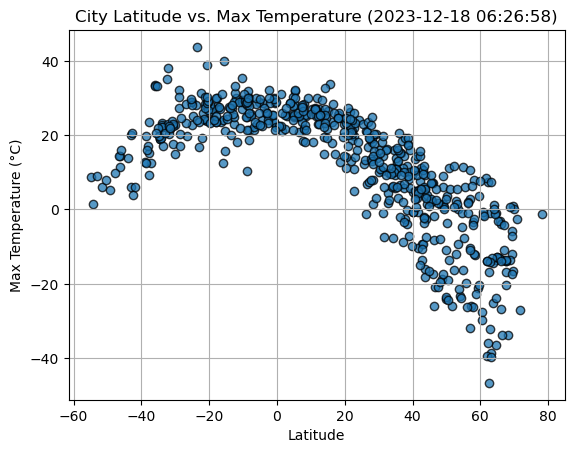

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

#covert date column
# city_data_df["Date"] = pd.to_datetime(city_data_df['Date'], unit='s')
city_date_covert = pd.to_datetime(city_data_df['Date'], unit='s')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({city_date_covert[0]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()



In [11]:
city_data_df.head(1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dilling,12.05,29.65,22.89,29,71,4.41,SD,1702880818


#### Latitude Vs. Humidity

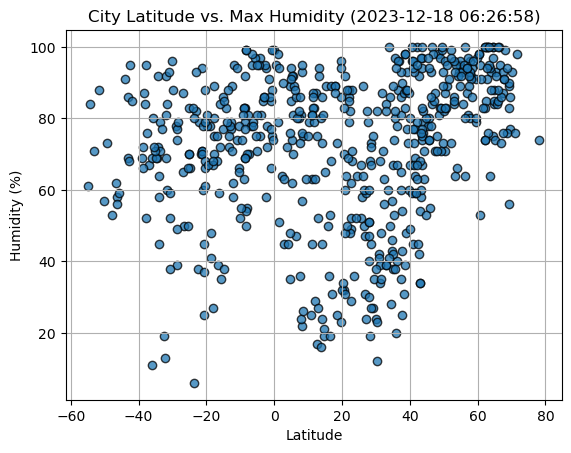

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)
city_date

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Humidity ({city_date_covert[0]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

In [13]:
city_data_df.head(1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dilling,12.05,29.65,22.89,29,71,4.41,SD,1702880818


#### Latitude Vs. Cloudiness

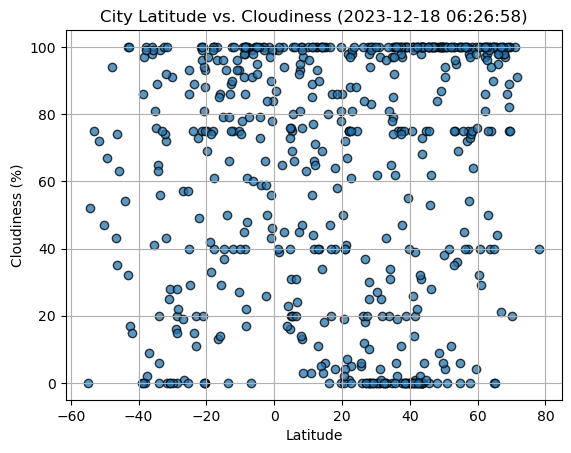

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)
city_date


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({city_date_covert[0]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

In [15]:
city_data_df.head(1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dilling,12.05,29.65,22.89,29,71,4.41,SD,1702880818


#### Latitude vs. Wind Speed Plot

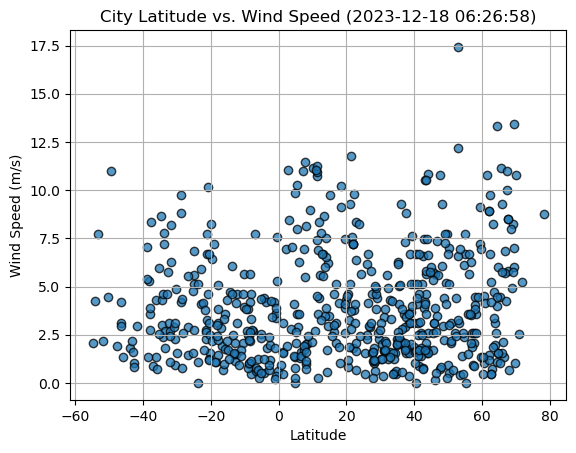

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)
city_date

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({city_date_covert[0]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
northern_hemi_df = pd.DataFrame(city_data_df)[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dilling,12.0500,29.6500,22.89,29,71,4.41,SD,1702880818
2,talnakh,69.4865,88.3972,-16.53,77,100,7.02,RU,1702880745
3,ishigaki,24.3448,124.1572,24.07,64,75,5.66,JP,1702880746
7,sorokyne,48.2923,39.7373,1.31,98,100,6.07,UA,1702880818
8,longyearbyen,78.2186,15.6401,-1.09,74,40,8.75,SJ,1702880731


In [18]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)


City_ID
0      24.024049
2     -16.888080
3      15.266439
7      -1.791411
8     -23.107972
         ...    
587    -7.863357
588    -7.523803
590    22.635060
592     2.301262
595     0.727431
Name: Lat, Length: 410, dtype: float64


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df)[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dilling,12.0500,29.6500,22.89,29,71,4.41,SD,1702880818
2,talnakh,69.4865,88.3972,-16.53,77,100,7.02,RU,1702880745
3,ishigaki,24.3448,124.1572,24.07,64,75,5.66,JP,1702880746
7,sorokyne,48.2923,39.7373,1.31,98,100,6.07,UA,1702880818
8,longyearbyen,78.2186,15.6401,-1.09,74,40,8.75,SJ,1702880731


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df)[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,23.55,88,78,3.37,EC,1702880727
4,rabaul,-4.1967,152.1721,28.69,75,73,4.39,PG,1702880818
5,kone,-21.0595,164.8658,27.89,60,100,3.29,NC,1702880749
6,waitangi,-43.9535,-176.5597,13.79,91,54,1.79,NZ,1702880726
10,itaituba,-4.2761,-55.9836,24.11,97,79,0.51,BR,1702880818


###  Temperature vs. Latitude Linear Regression Plot

In [21]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.71x +32.61


In [22]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      24.024049
2     -16.888080
3      15.266439
7      -1.791411
8     -23.107972
         ...    
587    -7.863357
588    -7.523803
590    22.635060
592     2.301262
595     0.727431
Name: Lat, Length: 410, dtype: float64


In [23]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.71x +32.61


The r-value is: 0.6830397290470156


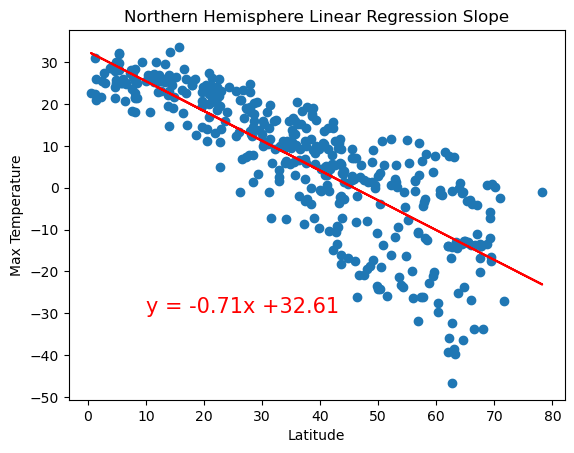

In [24]:
# Linear regression on Northern Hemisphere
# Create Plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere Linear Regression Slope")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [25]:
#Southern HF Lat and Max Temp

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

City_ID
1      29.693168
4      28.698479
5      23.847079
6      17.260512
10     28.675636
         ...    
580    24.709829
589    20.808006
591    25.663837
593    26.310496
594    24.541094
Name: Lat, Length: 186, dtype: float64


In [26]:
# Create Southern HF line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.29x +29.91


The r-value is: 0.3217460848636514


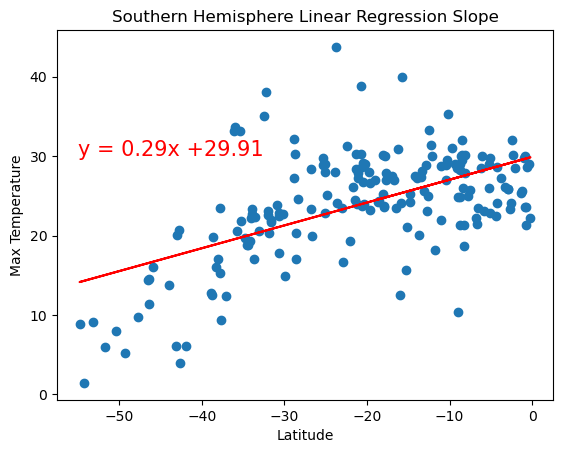

In [27]:
# Linear regression on Southern Hemisphere
# Create Plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere Linear Regression Slope")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = 0.46x +55.67
The r-value is: 0.1536016753494128


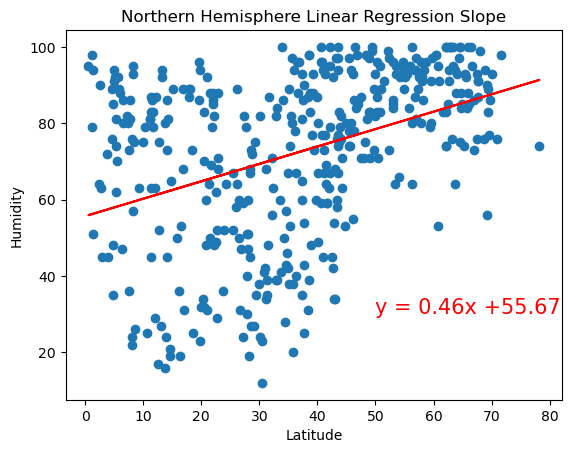

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept


# Create Northern HF line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Linear regression on Northan Hemisphere
# Create Plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere Linear Regression Slope")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.29x +77.98
The r-value is: 0.051282633613885235


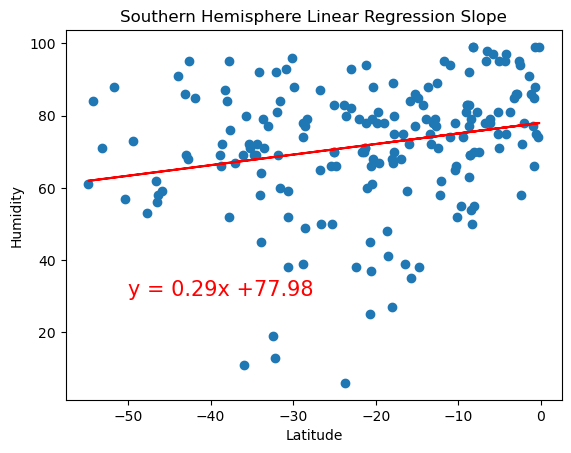

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept


# Create Northern HF line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Linear regression on Southern Hemisphere
# Create Plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere Linear Regression Slope")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.38x +47.07
The r-value is: 0.03391956252317457


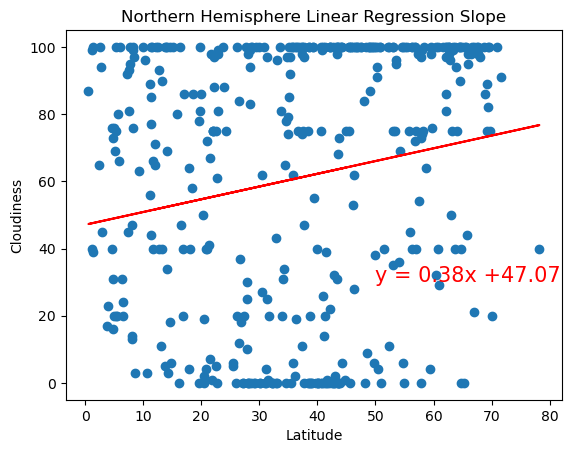

In [30]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept


# Create Northern HF line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Linear regression on Northan Hemisphere
# Create Plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere Linear Regression Slope")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.72x +78.62
The r-value is: 0.08246296587005014


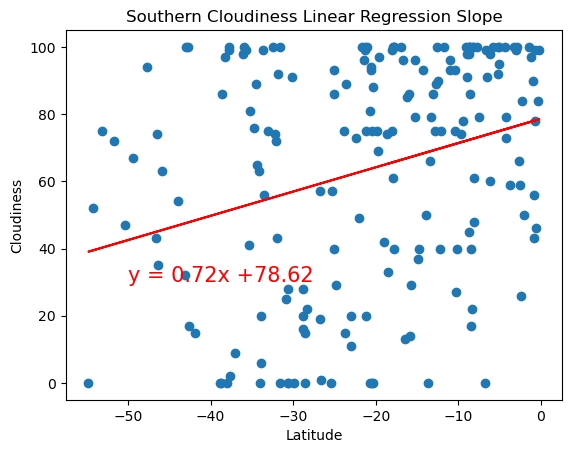

In [31]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept


# Create Northern HF line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Linear regression on Northan Hemisphere
# Create Plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Cloudiness Linear Regression Slope")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x +3.89
The r-value is: 0.001679520717791555


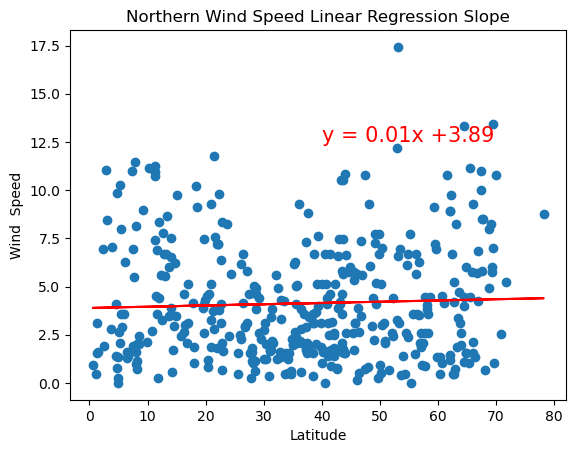

In [32]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept


# Create Northern HF line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Linear regression on Northan Hemisphere
# Create Plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Wind Speed Linear Regression Slope")
plt.xlabel('Latitude')
plt.ylabel('Wind  Speed')
plt.annotate(line_eq,(40,12.5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.04x +2.52
The r-value is: 0.050103360991353464


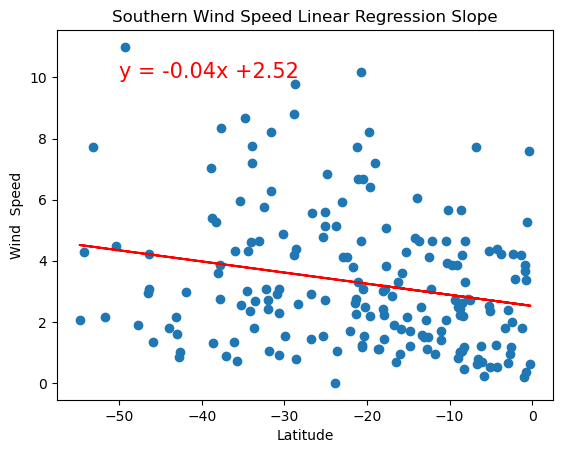

In [33]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept


# Create Northern HF line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Linear regression on Northan Hemisphere
# Create Plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Wind Speed Linear Regression Slope")
plt.xlabel('Latitude')
plt.ylabel('Wind  Speed')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show() 

**Discussion about the linear relationship:** YOUR RESPONSE HERE